In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
Ncols = 14

names= [str(i) for i in range(Ncols)]

condos = pd.read_csv("TorontoCondos-August2020.csv")
homes = pd.read_csv("TorontoHomes-August2020.csv")

condo_coords = pd.read_csv("condo_coordinates.txt", names = names)
condo_coords

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,43.64542,-79.38736,"0,#2506 -183 WELLINGTON ST W",Toronto,Ontario,"M5V 0A1""""","183 Wellington Street West, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
1,43.64309,-79.40183,"1,#PH 1027 -55 STEWART ST",Toronto,Ontario,"M5V 2V1""""","55 Stewart Street, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
2,43.63814,-79.39147,"3,#1003 -410 QUEENS QUAY W",Toronto,Ontario,"M5V 3T1""""","410 Queens Quay West, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
3,43.70565,-79.39738,"4,#4901 -2191 YONGE ST",Toronto,Ontario,"M4S 3H8""""","2191 Yonge Street, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
4,43.65471,-79.37921,"5,#1801 -210 VICTORIA ST",Toronto,Ontario,"M5B 2R3""""","210 Victoria Street, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,43.75201,-79.33483,"1005,12-48 Three Valleys Dr",Toronto,ON,"M3A 3B5""""","48 Three Valleys Drive, North York, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
672,43.76660,-79.38317,"1006,#412 -12 REAN DR",Toronto,Ontario,"M2K 3C6""""","12 Rean Drive, North York, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
673,43.63964,-79.41518,"1007,#2208 -50 LYNN WILLIAMS ST",Toronto,Ontario,"M6K 3R9""""","50 Lynn Williams Street, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN
674,43.63616,-79.47062,"1009,1516-105 The Queensway",Toronto,ON,"M6S 5B5""""","105 The Queensway, Toronto, ON, CA",NaN,MapQuest,address,NaN,NaN,NaN,NaN


In [44]:
homes = homes.drop(columns = 'Unnamed: 0')
condos = condos.drop(columns = 'Unnamed: 0')
homes = homes.dropna(axis = 0, subset = ['Floor Area (m^2)', 'Price'])
condos = condos.dropna(axis = 0, subset = ['Floor Area (m^2)', 'Price', 'Condo Fees', 'Bedrooms', 'Bathrooms'])
homes.columns

Index(['Address', 'Style', 'Building Type', 'Basement Development',
       'Exterior Finish', 'Fireplace', 'OwnershipType', 'Property Type',
       'Bedrooms', 'Bathrooms', 'Amenities Nearby', 'Lot Size', 'Parking Type',
       'No. of Parking Spaces', 'Storeys', 'Floor Area (m^2)', 'Features',
       'Condo Fees', 'Community Features', 'Price'],
      dtype='object')

In [45]:
condos['Floor Area (m^2)'] = condos['Floor Area (m^2)'].apply(lambda x: round(x*10.75))
condos = condos.rename({'Floor Area (m^2)': 'Floor Area (sqft)'}, axis = 1)
condos.sort_values(by = 'Floor Area (sqft)', ascending = False, axis = 0)

,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,Amenities Nearby,Lot Size,Parking Type,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees,Community Features,Price
2,"#3703 -2045 LAKE SHORE BLVD W, Toronto, Ontari...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,3,4.0,"Marina, Park, Public Transit",NaN,Underground,NaN,1.0,35389,Balcony,"$3,123 Monthly",NaN,"$2,298,000"
881,"#601 -452 SCARBOROUGH GOLF CLU RD, Toronto, On...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2+1,2.0,Hospital,NaN,"Underground, Visitor parking",NaN,1.0,16380,"Conservation/green belt, Balcony",$996 Monthly,NaN,"$629,000"
513,"#708 -44 LONGBOURNE RD, Toronto, Ontario, M9R...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2,2.0,"Park, Public Transit, Schools",NaN,"Underground, Visitor parking",NaN,1.0,13214,Balcony,$740 Monthly,NaN,"$499,999"
649,"#203 -25 SILVER SPRINGS BLVD, Toronto, Ontario...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2+1,2.0,"Hospital, Park, Public Transit, Schools",NaN,"Underground, Visitor parking",NaN,1.0,10957,Balcony,$630 Monthly,"Community Centre, School Bus","$459,999"
894,"#1009 -225 WELLESLEY ST E, Toronto, Ontario, M...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,1+1,2.0,"Hospital, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,9102,Balcony,$570 Monthly,Community Centre,"$599,900"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,"#1411 -101 ERSKINE AVE, Toronto, Ontario, M4P 0C5",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,1,1.0,"Park, Public Transit, Schools",NaN,"Underground, Visitor parking",NaN,1.0,258,Balcony,$294 Monthly,NaN,"$535,000"
611,"#2002 -20 THOMAS RILEY RD, Toronto, Ontario, M...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2,2.0,Public Transit,NaN,"Underground, Visitor parking",NaN,0.0,0,Balcony,$578 Monthly,NaN,"$590,000"
65,"#304 -660 PAPE AVE, Toronto, Ontario, M4K 3S5",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1+1,2.0,"Park, Public Transit, Schools",NaN,Underground,NaN,0.0,0,Balcony,$839 Monthly,Community Centre,"$689,000"
823,"3108-1 Palace Pier CRT, Toronto, ON, M8V 3W9",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,NaN,NaN,Underground,1.0,0.0,0,NaN,"$1,151 Monthly",NaN,"$875,000"


In [46]:
# Some Square Footage computations appeared unreasonable. Some listings provided several names for the same room,
# which gave the appearance of a larger square footage than was actually there. To accomadate this, I set some 'reasonable'
# threshold.

threshold = 2500

condos = condos[condos['Floor Area (sqft)'] < threshold]
condos

,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,Amenities Nearby,Lot Size,Parking Type,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees,Community Features,Price
0,"#2506 -183 WELLINGTON ST W, Toronto, Ontario, ...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,1731,NaN,"$2,565 Monthly",NaN,"$2,890,000"
1,"#PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2+1,3.0,NaN,NaN,Underground,NaN,2.0,1656,NaN,"$2,254 Monthly",NaN,"$2,680,000"
3,"#1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,3,2.0,"Marina, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,911,NaN,"$1,201 Monthly",Community Centre,"$1,399,900"
4,"#4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2+1,3.0,"Park, Public Transit, Schools",NaN,Underground,NaN,5.0,897,NaN,$996 Monthly,NaN,"$1,399,900"
5,"#1801 -210 VICTORIA ST, Toronto, Ontario, M5B...",Apartment,Apartment,NaN,Concrete,NaN,Shares in Co-operative,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,Underground,NaN,1.0,687,NaN,"$1,176 Monthly",NaN,"$1,399,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,"12-48 Three Valleys Dr, Toronto, ON, M3A 3B5",Townhouse,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,NaN,NaN,Exclusive,1.0,2.0,938,NaN,$543 Monthly,NaN,"$629,900"
1006,"#412 -12 REAN DR, Toronto, Ontario, M2K 3C6",Apartment,Apartment,NaN,Stucco,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,836,Balcony,$604 Monthly,NaN,"$629,900"
1007,"#2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,577,Balcony,$500 Monthly,NaN,"$619,000"
1009,"1516-105 The Queensway, Toronto, ON, M6S 5B5",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,1+1,1.0,NaN,NaN,Owned,1.0,1.0,635,NaN,$656 Monthly,NaN,"$599,950"


In [47]:
condos['Price'] = condos['Price'].str.replace('$', '')
condos['Price'] = condos['Price'].str.replace(',', '').astype(int)
condos = condos.rename({'Price': 'Price ($)'}, axis = 1)

# Want to align index with Latitude / Longitude Dataframe so we will reset it
condos = condos.reset_index(drop = True)
condos

,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,Amenities Nearby,Lot Size,Parking Type,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees,Community Features,Price ($)
0,"#2506 -183 WELLINGTON ST W, Toronto, Ontario, ...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,1731,NaN,"$2,565 Monthly",NaN,2890000
1,"#PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2+1,3.0,NaN,NaN,Underground,NaN,2.0,1656,NaN,"$2,254 Monthly",NaN,2680000
2,"#1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,3,2.0,"Marina, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,911,NaN,"$1,201 Monthly",Community Centre,1399900
3,"#4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2+1,3.0,"Park, Public Transit, Schools",NaN,Underground,NaN,5.0,897,NaN,$996 Monthly,NaN,1399900
4,"#1801 -210 VICTORIA ST, Toronto, Ontario, M5B...",Apartment,Apartment,NaN,Concrete,NaN,Shares in Co-operative,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,Underground,NaN,1.0,687,NaN,"$1,176 Monthly",NaN,1399000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,"12-48 Three Valleys Dr, Toronto, ON, M3A 3B5",Townhouse,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,NaN,NaN,Exclusive,1.0,2.0,938,NaN,$543 Monthly,NaN,629900
672,"#412 -12 REAN DR, Toronto, Ontario, M2K 3C6",Apartment,Apartment,NaN,Stucco,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,836,Balcony,$604 Monthly,NaN,629900
673,"#2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,577,Balcony,$500 Monthly,NaN,619000
674,"1516-105 The Queensway, Toronto, ON, M6S 5B5",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,1+1,1.0,NaN,NaN,Owned,1.0,1.0,635,NaN,$656 Monthly,NaN,599950


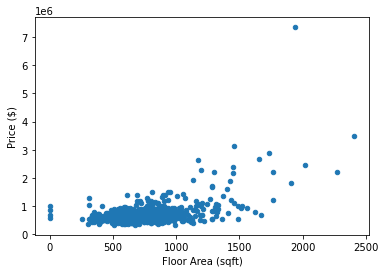

In [48]:
# We can see how much of an effect Square Footage has on Price
condos.plot(x = 'Floor Area (sqft)', y = 'Price ($)', kind = 'scatter')

In [49]:
# Clean up the Condo Fees Column

def condo_fees_converter(condo_fees):
    condo_fees = condo_fees.str.strip()
    condo_fees = condo_fees.where((condo_fees.str[-8:-1] + condo_fees.str[-1]).str.strip() =="Monthly", 
                     other = "na")
    condo_fees = condo_fees.where(condo_fees == "na",
                     other =  condo_fees.str.replace("$", "").str.replace("Monthly", "").str.replace(",", "").str.strip())
    return condo_fees

condos['Condo Fees'] = condo_fees_converter(condos['Condo Fees'])
condos = condos[condos['Condo Fees'] != 'na']
condos['Condo Fees'] = condos['Condo Fees'].astype(int)
condos = condos.rename({'Condo Fees': 'Condo Fees ($ Monthly)'}, axis=1)
condos

,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,Amenities Nearby,Lot Size,Parking Type,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees ($ Monthly),Community Features,Price ($)
0,"#2506 -183 WELLINGTON ST W, Toronto, Ontario, ...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,1731,NaN,2565,NaN,2890000
1,"#PH 1027 -55 STEWART ST, Toronto, Ontario, M5V...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2+1,3.0,NaN,NaN,Underground,NaN,2.0,1656,NaN,2254,NaN,2680000
2,"#1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,3,2.0,"Marina, Park, Public Transit",NaN,"Underground, Visitor parking",NaN,1.0,911,NaN,1201,Community Centre,1399900
3,"#4901 -2191 YONGE ST, Toronto, Ontario, M4S 3H8",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2+1,3.0,"Park, Public Transit, Schools",NaN,Underground,NaN,5.0,897,NaN,996,NaN,1399900
4,"#1801 -210 VICTORIA ST, Toronto, Ontario, M5B...",Apartment,Apartment,NaN,Concrete,NaN,Shares in Co-operative,Single Family,2,3.0,"Hospital, Park, Public Transit",NaN,Underground,NaN,1.0,687,NaN,1176,NaN,1399000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,"12-48 Three Valleys Dr, Toronto, ON, M3A 3B5",Townhouse,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0,NaN,NaN,Exclusive,1.0,2.0,938,NaN,543,NaN,629900
672,"#412 -12 REAN DR, Toronto, Ontario, M2K 3C6",Apartment,Apartment,NaN,Stucco,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,836,Balcony,604,NaN,629900
673,"#2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1+1,1.0,NaN,NaN,"Underground, Visitor parking",NaN,1.0,577,Balcony,500,NaN,619000
674,"1516-105 The Queensway, Toronto, ON, M6S 5B5",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,1+1,1.0,NaN,NaN,Owned,1.0,1.0,635,NaN,656,NaN,599950


In [50]:
condos['Postal Code'] = condos['Address'].str[-7:-1] + condos['Address'].str[-1]

condo_coords = condo_coords[['0', '1']]
condo_coords = condo_coords.rename({"0": "Latitude", "1": "Longitude"}, axis = 1)

condos = pd.concat([condos, condo_coords], axis = 1)

condos = condos[condos['Condo Fees ($ Monthly)'] < 3000]
condos.sort_values(by = 'Floor Area (sqft)', ascending = False)

,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,...,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees ($ Monthly),Community Features,Price ($),Postal Code,Latitude,Longitude
449,"#1302 -552 WELLINGTON ST W, Toronto, Ontario, ...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2+1,3.0,...,NaN,1.0,2407,Balcony,1780,NaN,3500000,M5V 2V4,43.642800,-79.401583
537,"#302 -4 THE KINGSWAY, Toronto, Ontario, M8X 1A7",Apartment,Apartment,NaN,"Brick, Concrete",NaN,Condominium/Strata,Single Family,2,3.0,...,NaN,1.0,2274,Balcony,2138,NaN,2199999,M8X 1A7,43.657820,-79.515663
360,"#2410 -101 ERSKINE AVE, Toronto, Ontario, M4P...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2,3.0,...,NaN,1.0,2022,NaN,1106,NaN,2450000,M4P 0C5,43.713643,-79.386696
448,"#502 -128 HAZELTON AVE, Toronto, Ontario, M5R 2E5",Apartment,Apartment,NaN,NaN,NaN,Condominium/Strata,Single Family,3+1,4.0,...,NaN,6.0,1938,Balcony,0,NaN,7350000,M5R 2E5,43.674543,-79.394579
452,"#PH801 -1801 BAYVIEW AVE, Toronto, Ontario, M4...",Apartment,Apartment,NaN,"Concrete, Stucco",NaN,Condominium/Strata,Single Family,3+1,3.0,...,NaN,2.0,1907,NaN,2329,Community Centre,1825000,M4G 4K2,43.711060,-79.377170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,"#1411 -101 ERSKINE AVE, Toronto, Ontario, M4P 0C5",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,1,1.0,...,NaN,1.0,258,Balcony,294,NaN,535000,M4P 0C5,43.713643,-79.386696
552,"3108-1 Palace Pier CRT, Toronto, ON, M8V 3W9",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,...,1.0,0.0,0,NaN,1151,NaN,875000,M8V 3W9,43.631100,-79.475192
543,"#807 -138 PRINCESS ST, Toronto, Ontario, M5A 0B1",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,1+1,2.0,...,NaN,0.0,0,Balcony,716,NaN,999000,M5A 0B1,43.652187,-79.367278
47,"#304 -660 PAPE AVE, Toronto, Ontario, M4K 3S5",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1+1,2.0,...,NaN,0.0,0,Balcony,839,Community Centre,689000,M4K 3S5,43.669669,-79.341056


In [51]:
# Clean up Bedrooms and Bathrooms

print(condos['Bedrooms'].unique())

def bedroom_converter(bedrooms):
    pluses = bedrooms[bedrooms.str.len() != 1]
    singles = bedrooms[bedrooms.str.len() == 1]
    
    pluses = pluses.str[0].astype(int) + 0.5*pluses.str[2].astype(int)
    singles = singles.astype(int)
    
    bedrooms = pd.concat([pluses,singles],axis = 0)
    
    return bedrooms

condos['Bedrooms'] = bedroom_converter(condos['Bedrooms'])
condos[['Bathrooms','Storeys']] = condos[['Bathrooms', 'Storeys']].astype(int)
condos = condos[condos['Storeys'] == 1]
condos

['2' '2+1' '3' '2+2' '1+1' '1' '4' '3+1' '4+1' '3+2' '0' '4+2']


,Address,Style,Building Type,Basement Development,Exterior Finish,Fireplace,OwnershipType,Property Type,Bedrooms,Bathrooms,...,No. of Parking Spaces,Storeys,Floor Area (sqft),Features,Condo Fees ($ Monthly),Community Features,Price ($),Postal Code,Latitude,Longitude
0,"#2506 -183 WELLINGTON ST W, Toronto, Ontario, ...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2.0,3,...,NaN,1,1731,NaN,2565,NaN,2890000,M5V 0A1,43.64542,-79.38736
2,"#1003 -410 QUEENS QUAY W, Toronto, Ontario, M5...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,3.0,2,...,NaN,1,911,NaN,1201,Community Centre,1399900,M5V 3T1,43.63814,-79.39147
4,"#1801 -210 VICTORIA ST, Toronto, Ontario, M5B...",Apartment,Apartment,NaN,Concrete,NaN,Shares in Co-operative,Single Family,2.0,3,...,NaN,1,687,NaN,1176,NaN,1399000,M5B 2R3,43.65471,-79.37921
5,"#713 -89 SKYMARK DR, Toronto, Ontario, M2H 3S6",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,3.0,3,...,NaN,1,1265,"Conservation/green belt, Balcony",1112,Community Centre,1250000,M2H 3S6,43.79532,-79.35455
6,"#201 -70 ELMSTHORPE AVE, Toronto, Ontario, M5P...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,2.0,2,...,NaN,1,935,Balcony,1193,Community Centre,1199000,M5P 2L7,43.70377,-79.41107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,"#3308 -3303 DON MILLS RD, Toronto, Ontario, M2...",Apartment,Apartment,NaN,Concrete,NaN,Condominium/Strata,Single Family,2.0,2,...,NaN,1,979,Balcony,1057,NaN,659000,M2J 4T6,43.79189,-79.35351
672,"#412 -12 REAN DR, Toronto, Ontario, M2K 3C6",Apartment,Apartment,NaN,Stucco,NaN,Condominium/Strata,Single Family,1.5,1,...,NaN,1,836,Balcony,604,NaN,629900,M2K 3C6,43.76660,-79.38317
673,"#2208 -50 LYNN WILLIAMS ST, Toronto, Ontario, ...",Apartment,Apartment,NaN,Brick,NaN,Condominium/Strata,Single Family,1.5,1,...,NaN,1,577,Balcony,500,NaN,619000,M6K 3R9,43.63964,-79.41518
674,"1516-105 The Queensway, Toronto, ON, M6S 5B5",Apartment,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1,...,1.0,1,635,NaN,656,NaN,599950,M6S 5B5,43.63616,-79.47062


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

input_cols = ['Floor Area (sqft)', 'Bedrooms', 'Bathrooms', 'Condo Fees ($ Monthly)', 'Latitude', 'Longitude']
target_col = 'Price ($)'

X = condos[input_cols]
y = condos[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = {'bootstrap': True,
         'max_depth': 20,
         'max_features': 4,
         'min_samples_leaf': 2,
         'min_samples_split': 4,
         'n_estimators':30
        }

ForestModel = RandomForestRegressor(bootstrap = model['bootstrap'], 
                                   max_depth = model['max_depth'],
                                   max_features = model['max_features'],
                                   min_samples_leaf = model['min_samples_leaf'],
                                   n_estimators = model['n_estimators']
                                   )
ForestModel.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=4, min_samples_leaf=2,
                      n_estimators=30)

In [64]:
def mape(predictions, y):
    
    mape = np.mean(np.abs((predictions-y)/y))
    
    return mape

def mape_performance(predictions, y):
    
    return 100*(1-mape(predictions,y))

# Train MAPE Accuracy

predictions = ForestModel.predict(X_train)
train_mape_acc = mape_performance(predictions,y_train)
print("Train MAPE Accuracy = {:.1f}%".format(train_mape_acc))

# Test MAPE Accuracy

predictions = ForestModel.predict(X_test)
test_mape_acc = mape_performance(predictions,y_test)
print("Test MAPE Accuracy = {:.1f}%".format(test_mape_acc))

Train MAPE Accuracy = 93.6%
Test MAPE Accuracy = 86.1%


In [52]:
def measure_accuracy(predictions, y, threshold):
    accuracy_vec = np.abs(predictions - y) < threshold
    accuracy = np.sum(accuracy_vec)/accuracy_vec.size
    
    return accuracy

def display_threshold_accuracies(X, y, model, num_values, display_accs, increment = 10000):
    
    accuracy_table = []
    threshold_table = [increment*i for i in range(num_values)]
    
    display_accs.append(1.1)
    predictions = model.predict(X)
    
    j = 0
    display_acc = display_accs[j]
    for i in range(num_values):
        
        threshold = threshold_table[i]
        accuracy = measure_accuracy(predictions, y, threshold)
        
        if accuracy > display_acc:
            print("Accuracy of {:f} occurs for +- ${:n}".format(accuracy, threshold))
            
            j = j+1
            display_acc = display_accs[j]
        
        accuracy_table.append(accuracy)
    
    plt.plot(threshold_table, accuracy_table)
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")
    plt.show()

In [56]:
benchmark = 60000 # Set Benchmark for Performance

# Train Performance

predictions = ForestModel.predict(X_train)
accuracy = measure_accuracy(predictions, y_train, benchmark)
print("Training Performance Accuracy (+/- ${:n}) = {:.2f}".format(benchmark, accuracy))

# Test Performance

predictions = ForestModel.predict(X_test)
accuracy = measure_accuracy(predictions, y_test, benchmark)
print("Test Performance Accuracy (+/- ${:n}) = {:.2f}".format(benchmark, accuracy))

Training Performance Accuracy (+/- $80000) = 0.85
Test Performance Accuracy (+/- $80000) = 0.55


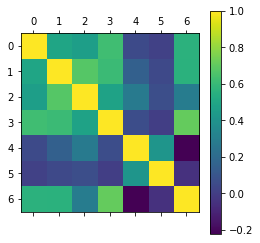

In [59]:
input_cols = ['Floor Area (sqft)', 'Bathrooms', 'Bedrooms', 'Condo Fees ($ Monthly)']
target_col = 'Price ($)'

total_cols = ['Floor Area (sqft)', 'Bathrooms', 'Bedrooms', 'Condo Fees ($ Monthly)', 'Latitude', 'Longitude', target_col]

Xy = condos[total_cols]

plt.matshow(Xy.corr())
cb = plt.colorbar()
plt.show()

In [109]:
# Predict a Value

def make_prediction(floor_area, bathrooms, bedrooms, condo_fees, **kwargs):
    """
    
    kwargs: 
    lat: (Float) Latitude
    long: (Float) Longitude
    """
    if not kwargs:
        
        rows = condos.shape[0]
        iloc = np.random.randint(0,rows)
        
        X = np.array([floor_area,bathrooms,bedrooms,condo_fees, condos['Latitude'].iloc[iloc], condos['Longitude'].iloc[iloc]]).reshape(1,-1)
        prediction = ForestModel.predict(X)[0]
        
        print("Prediction: ${:.2f}".format(prediction))
    else:
        X = np.array([floor_area,bathrooms,bedrooms,condo_fees, kwargs['lat'], kwargs['long']]).reshape(1,-1)
        prediction = ForestModel.predict(X)[0]
        
        print("Prediction: ${:.2f}".format(prediction))
              
floor_area = 850
bathrooms = 1
bedrooms = 1.5
condo_fees = 550

make_prediction(floor_area, bathrooms, bedrooms, condo_fees)

Prediction: $576105.21
